In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


In [4]:
def continuous_data_stream(length = 1000,seasonality=True):
    try: 
        for i in range(length):
            #Noise
            base = np.sin(i * 0.1) if seasonality else 1
            noise = np.random.normal(0,0.1)
            #Anomalies
            if np.random.random() > 0.80: # Generate random number between 0 and 1, if this number is greater than 0.80 (with %20 possibility) it is an anomaly
                anomaly = np.random.uniform(2,5)
            else:
                anomaly = 0
            data_point =  base + noise + anomaly
            yield data_point
            time.sleep(0.1)
    except Exception as e:
        print(f"Error during data generation: {e}")



In [5]:
#insert the first 100 generated data to a list to test the function
stream_data = list(continuous_data_stream(length=2000)) 


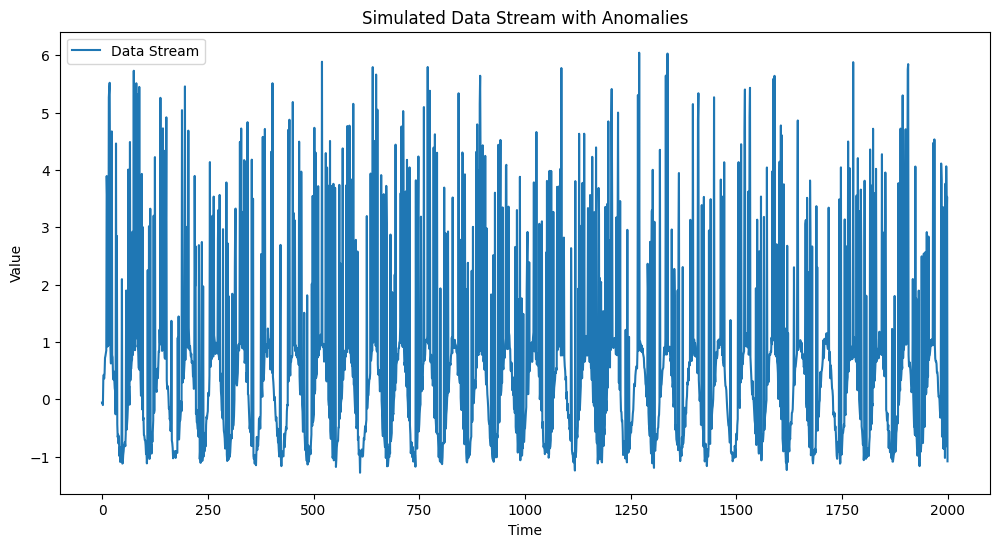

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(stream_data, label='Data Stream')
plt.title('Simulated Data Stream with Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [7]:
#Anomaly Detection
def EWMA(data, alpha=0.06):
    try:
        ewma = pd.Series(np.zeros(len(data)))  
        ewma[0] = data[0]  
        for i in range(1, len(data)):
            ewma[i] = alpha * data[i] + (1 - alpha) * ewma[i-1] 
        return ewma
    except Exception as e:
        print(f"Error during anomly detection {e}")

In [9]:
rets = pd.Series(stream_data)
lam = 0.94
ewma = EWMA(rets,lam)
ewma


0      -0.056773
1      -0.055062
2      -0.098267
3       0.341671
4       0.421726
          ...   
1995   -0.563805
1996    3.783858
1997    3.114014
1998    3.505048
1999   -0.806863
Length: 2000, dtype: float64

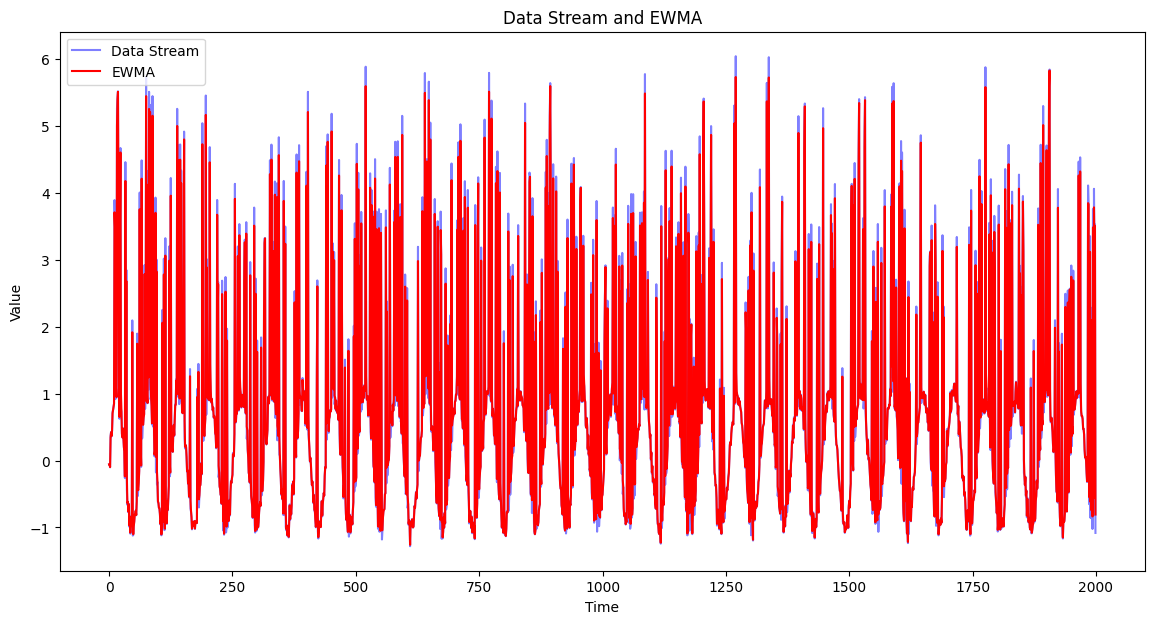

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(rets, label='Data Stream', color='blue', alpha=0.5)
plt.plot(ewma, label='EWMA', color='red')
plt.title('Data Stream and EWMA')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [12]:
mean = rets.mean()
threshold = 3

In [13]:
def detect_anomalies(data,ewma_vol,mean,threshold=3):
    anomalies = ((data < mean - threshold * ewma_vol) | (data > mean + threshold * ewma_vol))
    return anomalies

In [14]:
anomalies = detect_anomalies(rets,ewma,mean)
anomalies

0        True
1        True
2        True
3       False
4       False
        ...  
1995     True
1996    False
1997    False
1998    False
1999     True
Length: 2000, dtype: bool

In [15]:
anomalies.sum()

np.int64(868)

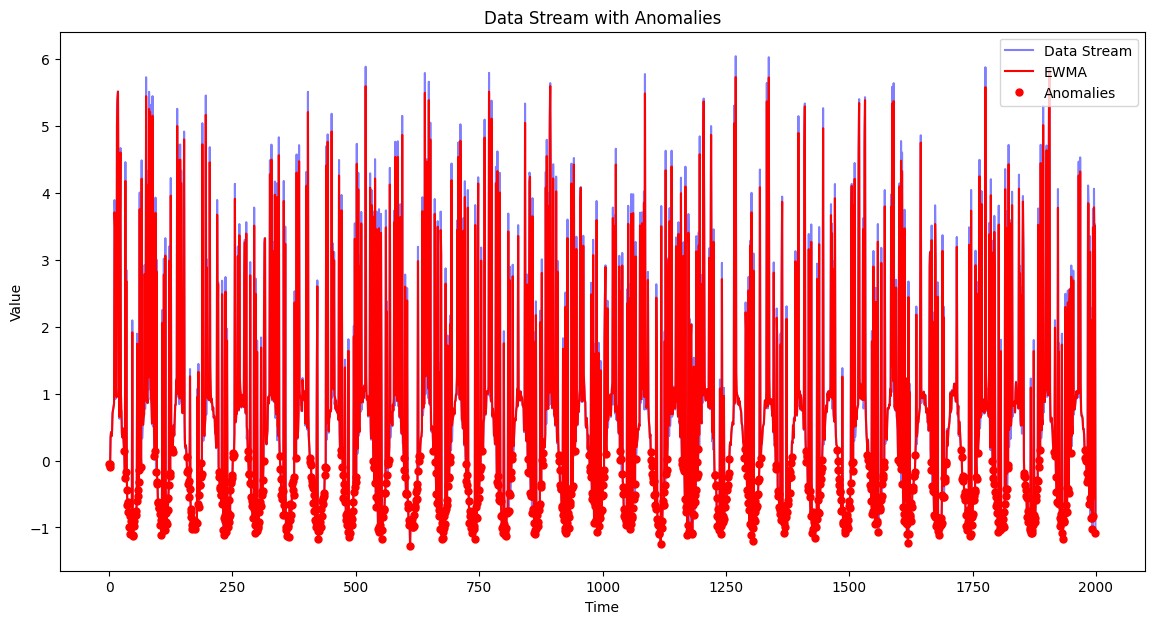

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(rets, label='Data Stream', color='blue', alpha=0.5)
plt.plot(ewma, label='EWMA', color='red')
plt.plot(rets[anomalies], 'ro', markersize=5, label='Anomalies')  
plt.title('Data Stream with Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()